# Rouse modes of a Gaussian chain 
The free energy of the top N Rouse modes of a 21 bead Gaussian chain are estimated using ANN sampling and compared to analytical result.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

Define Rouse mode free energy function.

In [2]:
kbT = 2./3.
def rouse_free_energy(N, mode, x): 
    n = len(x)
    b = 1.0
    a = 6.*np.sin(np.pi*mode*0.5/N)**2/b**2
    p = 4.*np.pi*x**2*np.exp(-a*x**2)/(np.pi/a)**1.5
    F = -kbT*np.log(p)
    return F

Load data from file and integrate out the free energy for each Rouse mode.

In [3]:
dim = (25, 25, 25)
X = np.loadtxt("ann.dat")
xg = X[:,0].reshape(dim, order="F")
yg = X[:,1].reshape(dim, order="F")
zg = X[:,2].reshape(dim, order="F")
fg = -X[:,4].reshape(dim, order="F") #-kbT*np.log(X[:,2]).reshape((30, 30))

In [4]:
# Project (integrate) first Rouse mode. 
fx1 = np.trapz(fg, zg, axis=2)/np.diff(zg[0,0,[1,-1]])
fx1 = np.trapz(fx1, yg[:,:,0], axis=1)/(15.0-0.01) # Grid is centered, then trapz, now full interval.
fx1 = fx1 - np.min(fx1)

# Project (integrate) second Rouse mode.
fx2 = np.trapz(fg, zg, axis=2)/np.diff(zg[0,0,[1,-1]])
fx2 = np.trapz(fx2, xg[:,:,0], axis=0)/(20.0-0.01) # Grid is centered, then trapz, now full interval.
fx2 = fx2 - np.min(fx2)

# Project (integrate) third Rouse mode.
fx3 = np.trapz(fg, yg, axis=1)/np.diff(yg[0,[1,-1],0])
fx3 = np.trapz(fx3, xg[:,:,0], axis=0)/(20.0-0.01) # Grid is centered, then trapz, now full interval.
fx3 = fx3 - np.min(fx3)

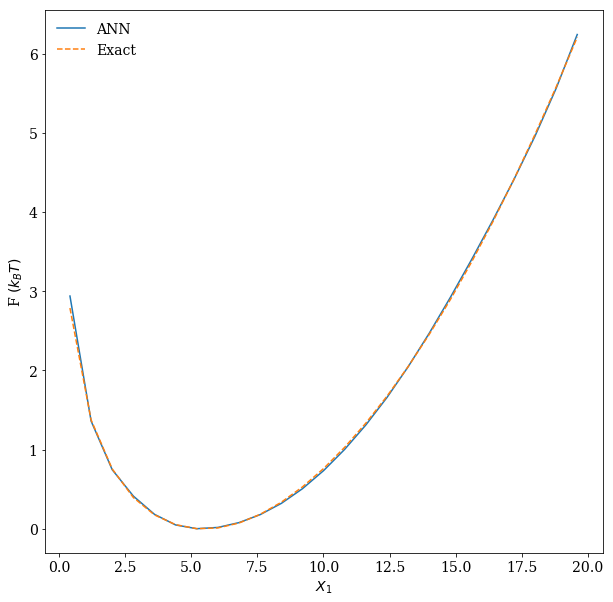

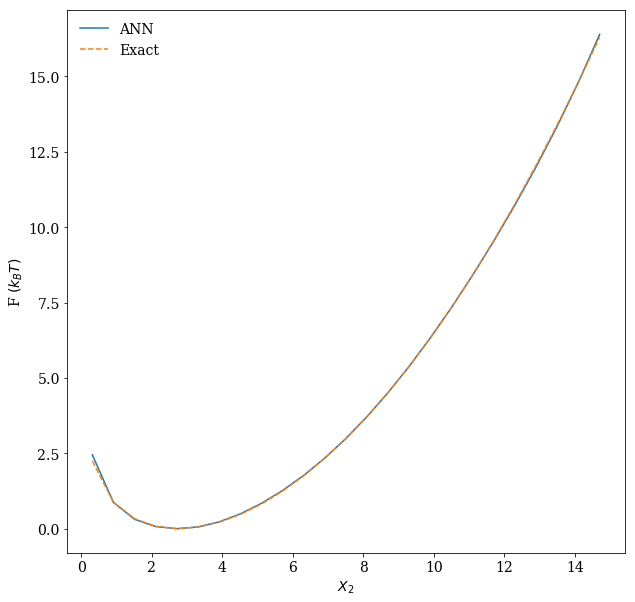

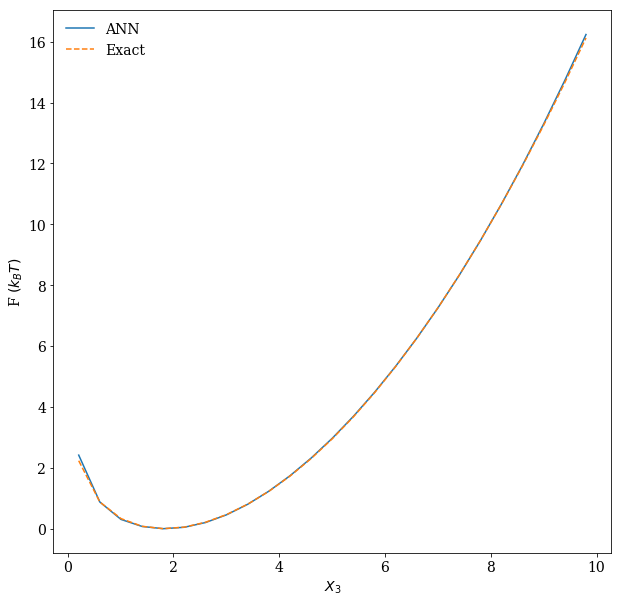

In [5]:
# Analytical free energies. 
fa1 = rouse_free_energy(21, 1, xg[:,0,0])
fa1 = fa1 - np.min(fa1)
fa2 = rouse_free_energy(21, 2, yg[0,:,0])
fa2 = fa2 - np.min(fa2)
fa3 = rouse_free_energy(21, 3, zg[0,0,:])
fa3 = fa3 - np.min(fa3)

# Set figure settings. 
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

fig = plt.figure(figsize=(10,10))
plt.plot(xg[:,0,0], fx1)
plt.plot(xg[:,0,0], fa1, linestyle="--")
plt.legend(["ANN", "Exact"], frameon=False)
plt.xlabel("$X_1$")
plt.ylabel("F $(k_BT)$")
plt.savefig("rouse_x1.png")
plt.show()

fig = plt.figure(figsize=(10,10))
plt.plot(yg[0,:,0], fx2)
plt.plot(yg[0,:,0], fa2, linestyle="--")
plt.legend(["ANN", "Exact"], frameon=False)
plt.xlabel("$X_2$")
plt.ylabel("F $(k_BT)$")
plt.savefig("rouse_x2.png")
plt.show()

fig = plt.figure(figsize=(10,10))
plt.plot(zg[0,0,:], fx3)
plt.plot(zg[0,0,:], fa3, linestyle="--")
plt.legend(["ANN", "Exact"], frameon=False)
plt.xlabel("$X_3$")
plt.ylabel("F $(k_BT)$")
plt.savefig("rouse_x3.png")
plt.show()